In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display, Markdown

## Preparación y lectura de datos

In [17]:
df = pd.read_excel('Regresión Lineal.xlsx', sheet_name = 1)
df['B0'] = 1
df['est+e'] = df['Estatura'] + np.random.normal(0,0.01,size = len(df['Estatura']))
for i in range(2, 21):
    df[f'x^{i}'] = df['Estatura'] ** i
df['C'] = 4
df['Peso_log'] = np.log(df['Peso'])
df.head()

,Estatura,Peso,B0,est+e,x^2,x^3,x^4,x^5,x^6,x^7,...,x^13,x^14,x^15,x^16,x^17,x^18,x^19,x^20,C,Peso_log
0,1.62,63,1,1.627628,2.6244,4.251528,6.887475,11.157710,18.075490,29.282294,...,529.291828,857.452762,1389.073474,2250.299028,3645.484426,5905.684770,9567.209328,15498.879111,4,4.143135
1,1.83,71,1,1.833762,3.3489,6.128487,11.215131,20.523690,37.558353,68.731786,...,2581.452668,4724.058383,8645.026840,15820.399117,28951.330385,52980.934604,96955.110325,177427.851894,4,4.262680
2,1.72,64,1,1.711332,2.9584,5.088448,8.752131,15.053665,25.892303,44.534761,...,1153.107534,1983.344959,3411.353330,5867.527727,10092.147690,17358.494027,29856.609726,51353.368730,4,4.158883
3,1.71,67,1,1.730474,2.9241,5.000211,8.550361,14.621117,25.002110,42.753608,...,1068.930416,1827.871012,3125.659431,5344.877626,9139.740741,15628.956667,26725.515901,45700.632191,4,4.204693
4,1.84,85,1,1.833913,3.3856,6.229504,11.462287,21.090609,38.806720,71.404365,...,2770.969204,5098.583335,9381.393337,17261.763739,31761.645280,58441.427316,107532.226261,197859.296320,4,4.442651


## Explicación de matrices

- $ \beta = (X^TX)^{-1}X^TY $
- $ c = X^TX $
- $ d = X^TY $
- $ c_{inv} = (X^TX)^{-1} $
- $ beta = c_{inv}d $

Para que esto funcione $X^TX$ tiene que ser invertible.

Si c ($X^TT$) tiene un valor propio que es 0, no se puede invertir y su determinante no puede ser 0.

## Cálculo de betas

In [18]:
variables = ['B0', 'Estatura','x^2','x^3']
def regresion(df):
    x = np.array(df[variables])
    y = np.array(df[['Peso']])

    c = np.dot(x.T,x) # X^T X
    d = np.dot(x.T, y) # X^T y
    valores_propios, vectores_propios = np.linalg.eig(c)
    det = np.linalg.det(c)
    
    if det > 0:
        c_inv = np.linalg.inv(c) # (X^T X)^-1
        beta = np.dot(c_inv, d)
        betas = []
        for i in range(len(beta)):
            betas.append(beta[i][0])
        for i, b in enumerate(betas):
            print(f"B{i} = {b}")
    else:
        print('X^T T no es invertible')

In [19]:
regresion(df)

B0 = -832.2935676574707
B1 = 1652.5787200927734
B2 = -1067.9180946350098
B3 = 238.76823234558105


## Análisis de ruido

In [20]:
x_new = df[['Estatura','est+e']]
display(Markdown("**Matriz de Covarianza**"))
display(x_new.cov())
display(Markdown("**Matriz de Correlación**"))
display(x_new.corr())

**Matriz de Covarianza**

,Estatura,est+e
Estatura,0.009135,0.009066
est+e,0.009066,0.009103


**Matriz de Correlación**

,Estatura,est+e
Estatura,1.000000,0.994251
est+e,0.994251,1.000000


In [21]:
np.linalg.det(x_new.cov())

9.532956711790822e-07

## Uso de $\lambda I$

In [22]:
variables = ['B0', 'Estatura','x^2','x^3']

x = np.array(df[variables])
y = np.array(df[['Peso']])

c = np.dot(x.T,x) # X^T X
d = np.dot(x.T, y) # X^T y
#valores_propios, vectores_propios = np.linalg.eig(c)
#det = np.linalg.det(c)

### $X^TX$ y valores propios

In [23]:
c

array([[ 21.        ,  35.83      ,  61.3155    , 105.232597  ],
       [ 35.83      ,  61.3155    , 105.232597  , 181.11179127],
       [ 61.3155    , 105.232597  , 181.11179127, 312.54970265],
       [105.232597  , 181.11179127, 312.54970265, 540.78771115]])

In [24]:
valores_propios, vectores_propios = np.linalg.eig(c)
valores_propios

array([8.03001807e+02, 1.21218433e+00, 1.01072065e-03, 7.99795859e-08])

### $X^TX + \lambda I$ y valores propios

In [25]:
lambda_I = 10 * np.identity(4)
c_i = c+lambda_I
c_i

array([[ 31.        ,  35.83      ,  61.3155    , 105.232597  ],
       [ 35.83      ,  71.3155    , 105.232597  , 181.11179127],
       [ 61.3155    , 105.232597  , 191.11179127, 312.54970265],
       [105.232597  , 181.11179127, 312.54970265, 550.78771115]])

In [26]:
valores_propios, vectores_propios = np.linalg.eig(c_i)
valores_propios

array([813.00180729,  11.21218433,  10.00101072,  10.00000008])

### $\beta 's$ para la regresión

In [27]:
variables = ['B0', 'Estatura','x^2']  

## No regularizado

In [28]:
x = np.array(df[variables])
y = np.array(df[['Peso']])

c = np.dot(x.T,x) # X^T X
d = np.dot(x.T, y) # X^T y
valores_propios, vectores_propios = np.linalg.eig(c)
det = np.linalg.det(c)
    
if det > 0:
    c_inv = np.linalg.inv(c) # (X^T X)^-1
    beta = np.dot(c_inv, d)
    betas = []
    for i in range(len(beta)):
        betas.append(beta[i][0])
    for i, b in enumerate(betas):
        print(f"B{i} = {b}")
else:
    print('X^T T no es invertible')

B0 = 295.28054578169537
B1 = -368.6941995498352
B2 = 136.82383260982417


## Regularizado

In [29]:
x = np.array(df[variables])
y = np.array(df[['Peso']])

c = np.dot(x.T,x) # X^T X
d = np.dot(x.T, y) # X^T y

lambda_I = 10 * np.identity(3)
c_i = c+lambda_I

c_inv = np.linalg.inv(c_i) # (X^T X)^-1 + lambda I
beta = np.dot(c_inv, d)
betas = []

for i in range(len(beta)):
    betas.append(beta[i][0])
for i, b in enumerate(betas):
    print(f"B{i} = {b}")

B0 = 4.5426960863740655
B1 = 8.354557499413588
B2 = 15.327814763288476


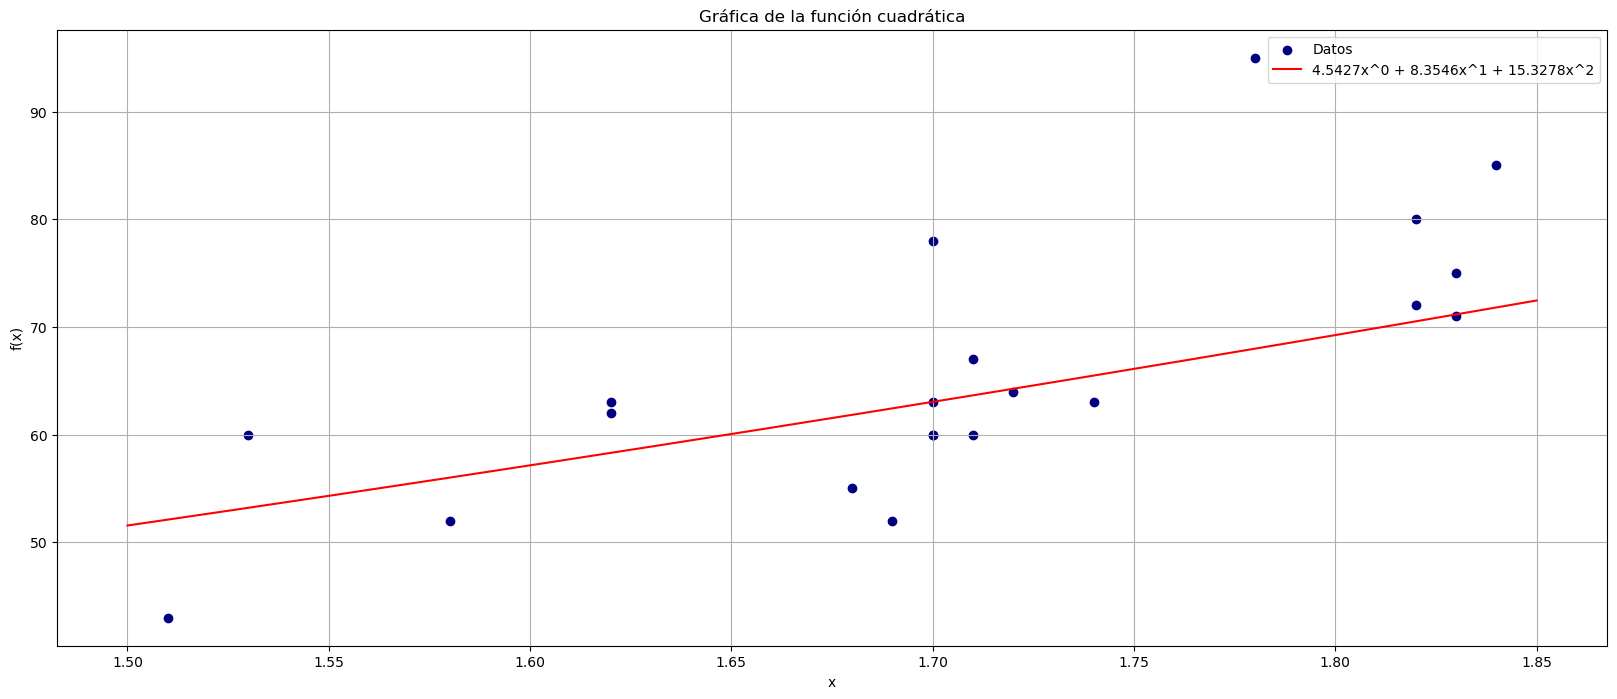

In [30]:
def grafica(x, betas):
    y = np.zeros_like(x)
    for i, b in enumerate(betas):
        y += b * x**i
    return y

# Crear un rango de valores para x
x = np.linspace(1.5, 1.85, 400)

# Calcular los valores de y
y = grafica(x, betas)

# Graficar
plt.figure(figsize=(20, 8))
plt.scatter(df['Estatura'], df['Peso'], color = 'navy', label = 'Datos')
#plt.plot(x, y, label=f'{betas[2].round(2)}x² + {betas[1].round(2)}x + {betas[0].round(2)}', c = 'red')

equation = " + ".join([f"{b:.4f}x^{i}" for i, b in enumerate(betas)])
plt.plot(x, y, label=equation, c='red')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función cuadrática")
plt.legend()
plt.grid()
plt.show()